# 회귀분석 - 평균으로 돌아간다.

In [1]:
# 보스턴 집값 데이터로 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")
data

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.corr() # 상관분석

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

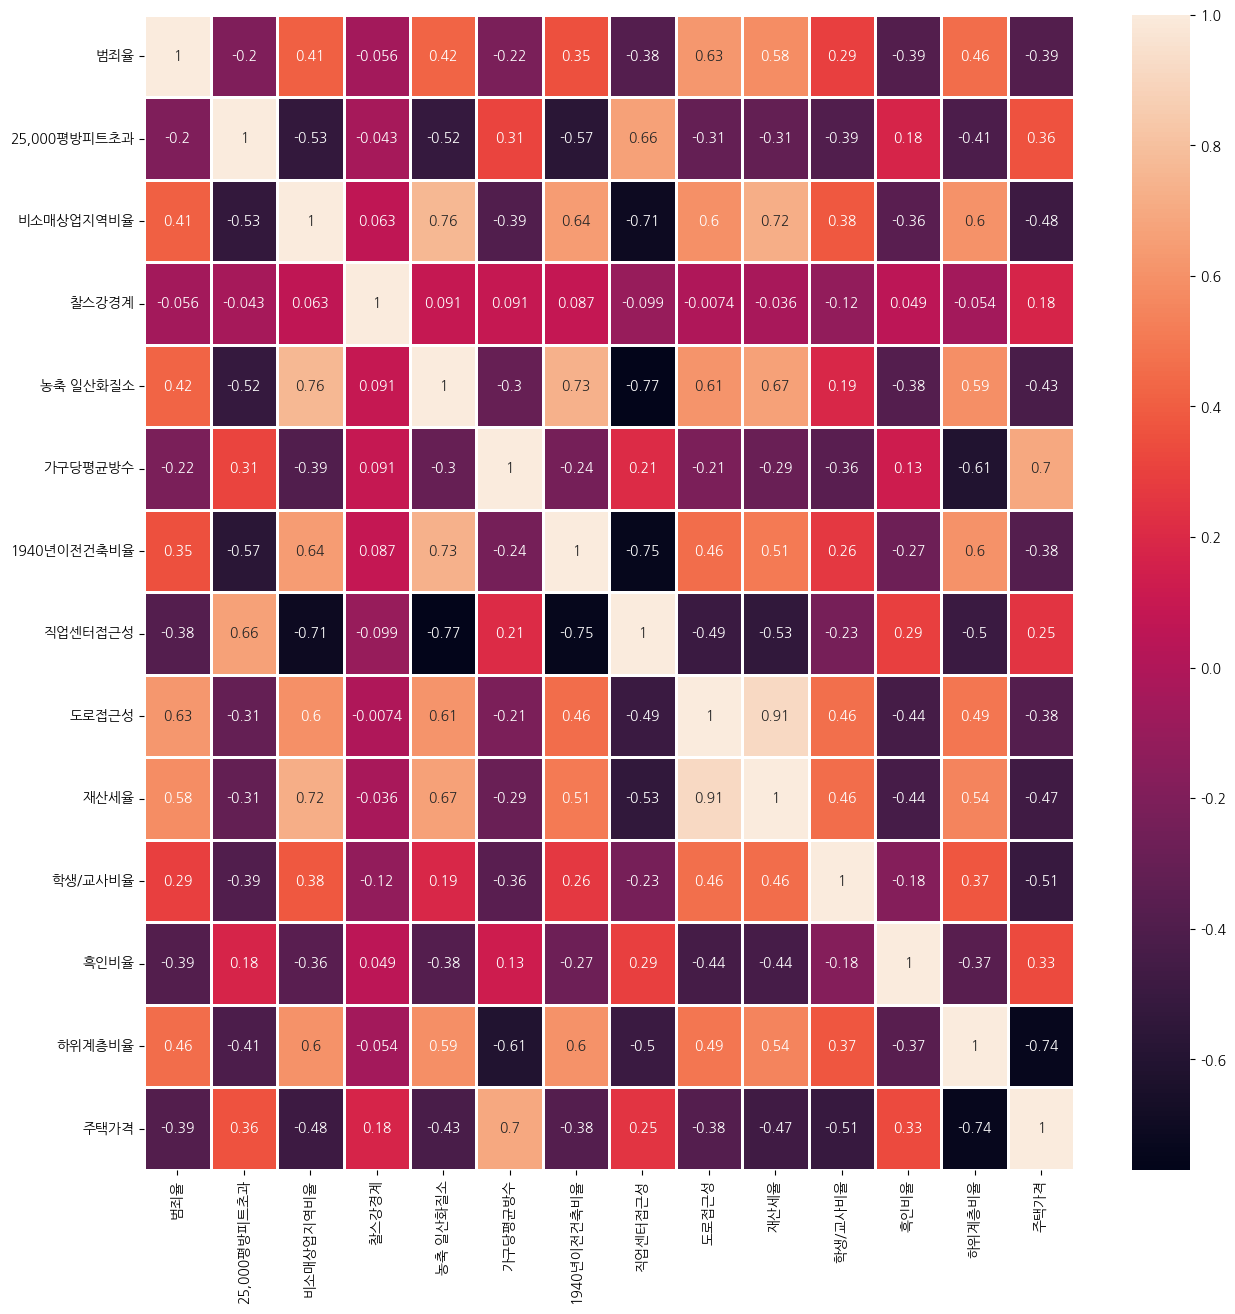

In [6]:
# 숫자데이터 많으면 피어슨
plt.figure(figsize=(15,15)) # 행렬 15 by 15
sns.heatmap(data.corr(), annot=True, linecolor='white', linewidth=1)

In [7]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: xlabel='하위계층비율', ylabel='주택가격'>

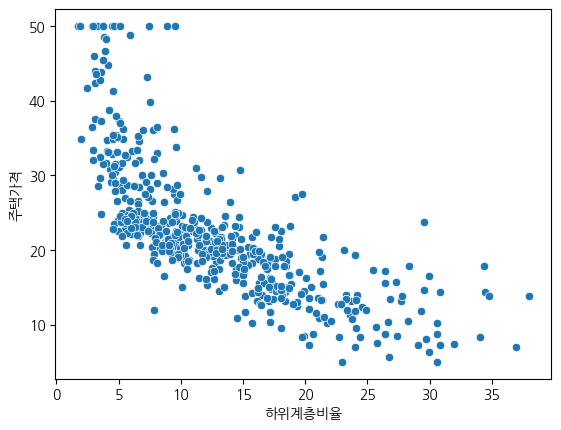

In [8]:
sns.scatterplot(data=data['주택가격'], x=data['하위계층비율'], y=data['주택가격']) # 반비례로 음의상관관계

<Axes: xlabel='1940년이전건축비율', ylabel='농축 일산화질소'>

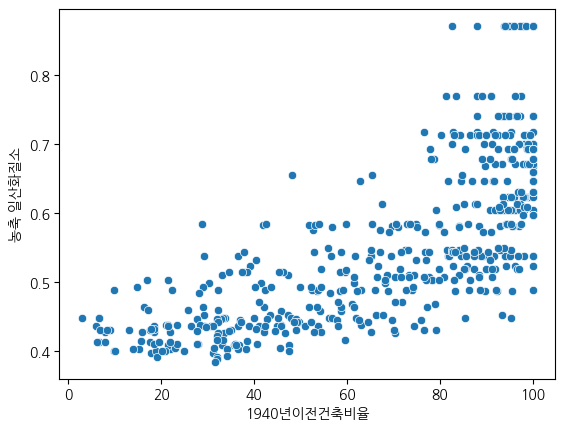

In [9]:
sns.scatterplot(data=data['농축 일산화질소'], x=data['1940년이전건축비율'], y=data['농축 일산화질소']) # 양의 상관관계

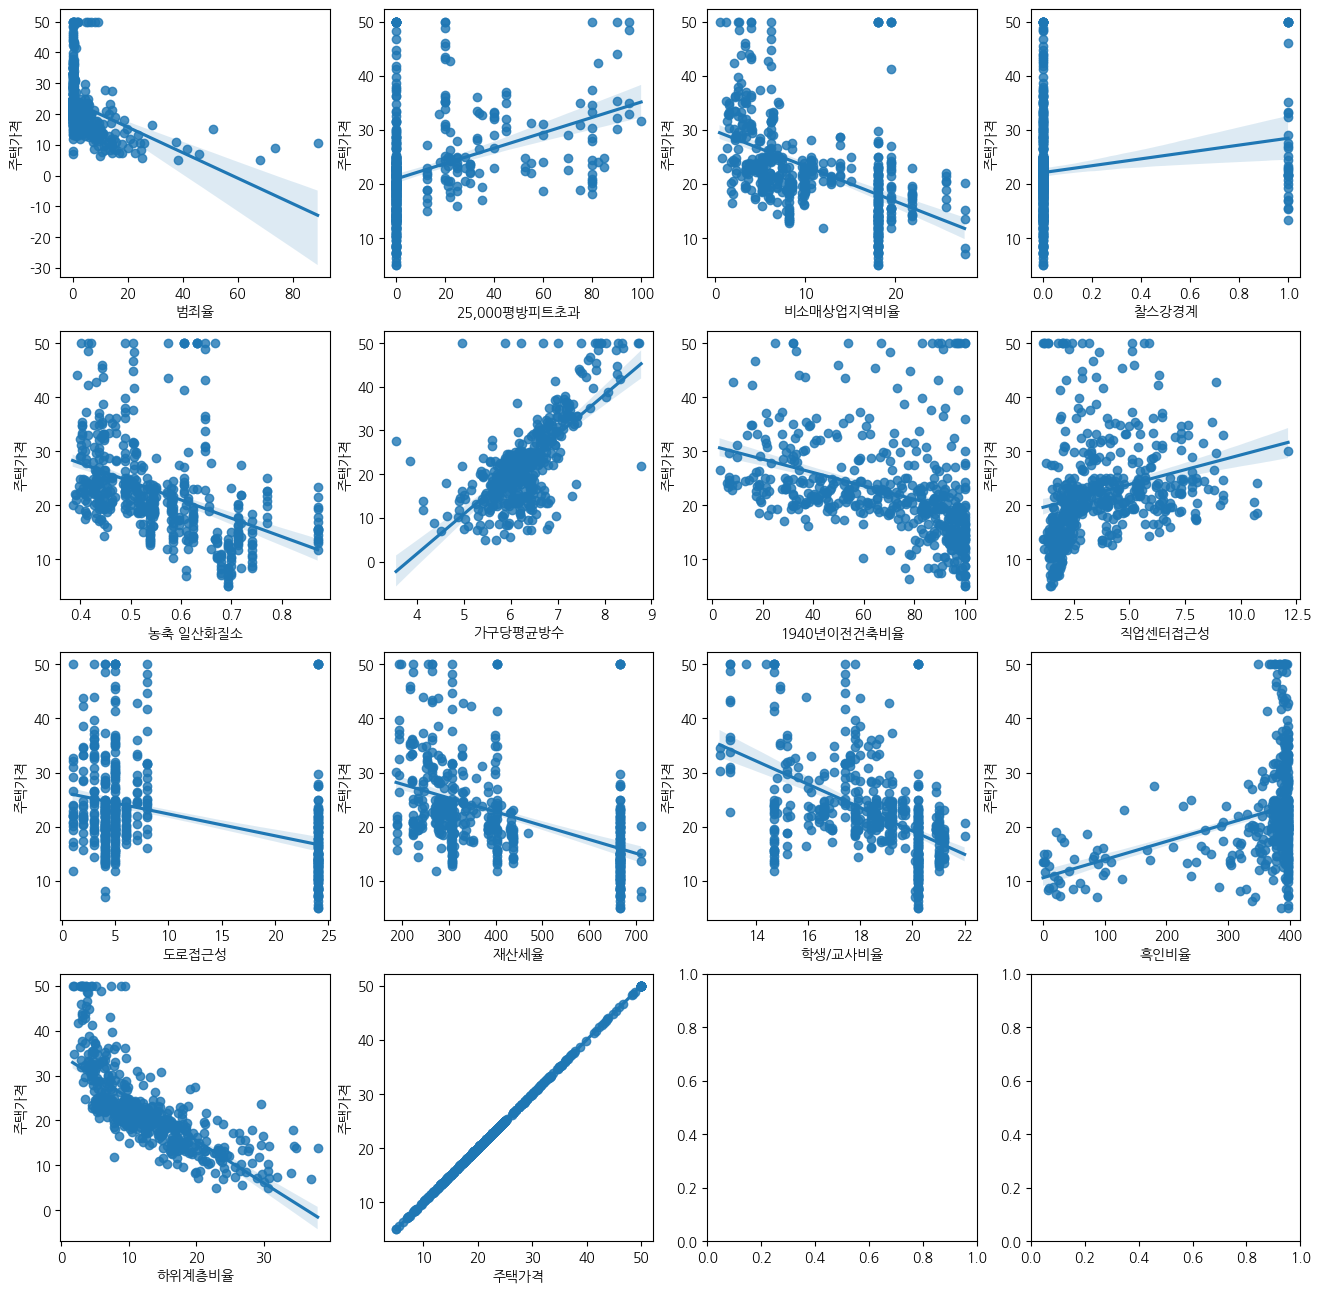

In [10]:
# 주택가격에 대한 각 독립변수의 산포도 그래프
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i, feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.regplot(data=data, x=feature, y='주택가격', ax=axs[row][col])

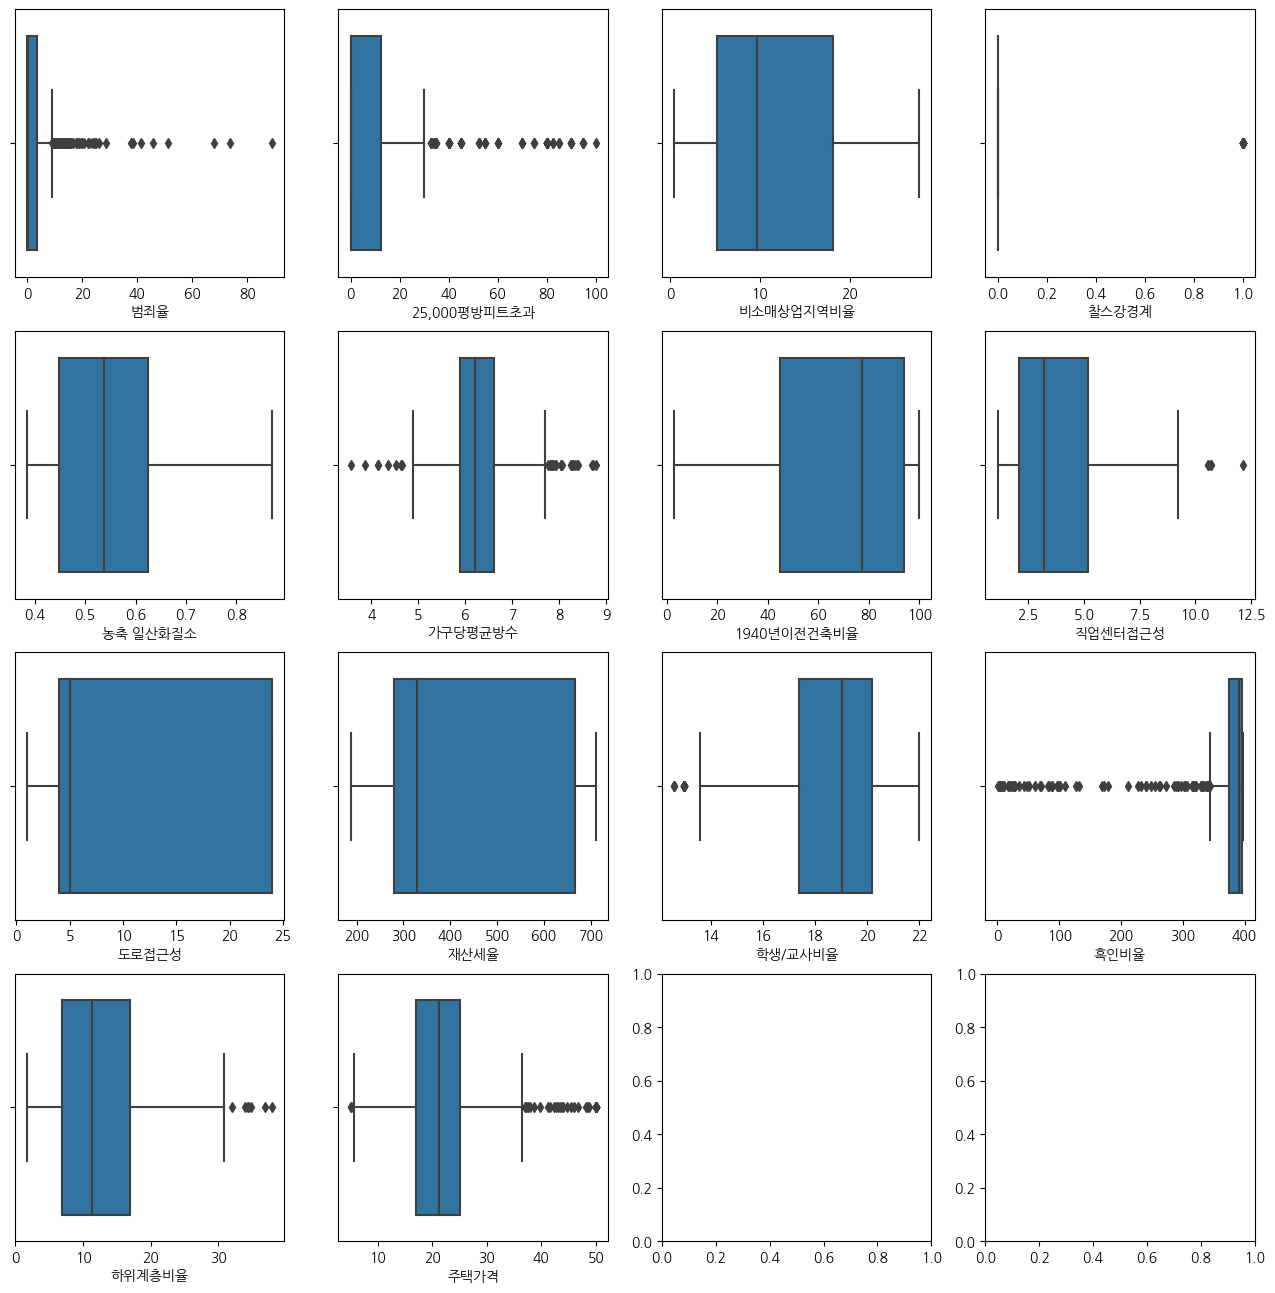

In [11]:
# 주택가격에 대한 각 독립변수의 상자수염 그래프
fig, axs = plt.subplots(figsize=(16,16), ncols=4, nrows=4)
for i, feature in enumerate(data):
    row = int(i/4)
    col = i%4
    sns.boxplot(x=data[feature], ax=axs[row][col])

* 독립변수에 이상치가 많은 컬럼이 많으므로 로버스트 스케일러를 이용해서 스케일링

In [12]:
data.head(2)

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [13]:
X = data.drop('주택가격', axis = 1)
y = data['주택가격']

In [14]:
# 이상값이 많기 때문에 RobustScaler 스케일러사용
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [15]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [16]:
X_scaled

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

# 사이킷런의 회귀분석

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# MSE = mean_squared_error
from math import sqrt

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print('coef: ', lr.coef_)
print('intercept: ', lr.intercept_)
print('mse: ', mean_squared_error(y_test, pred))
print('rmse: ', sqrt(mean_squared_error(y_test, pred)))
print('R_squared: ', r2_score(y_test, pred))   

coef:  [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]
intercept:  22.90779340154933
mse:  34.05648134887459
rmse:  5.835793120808395
R_squared:  0.5785415472763411


ValueError: x and y must be the same size

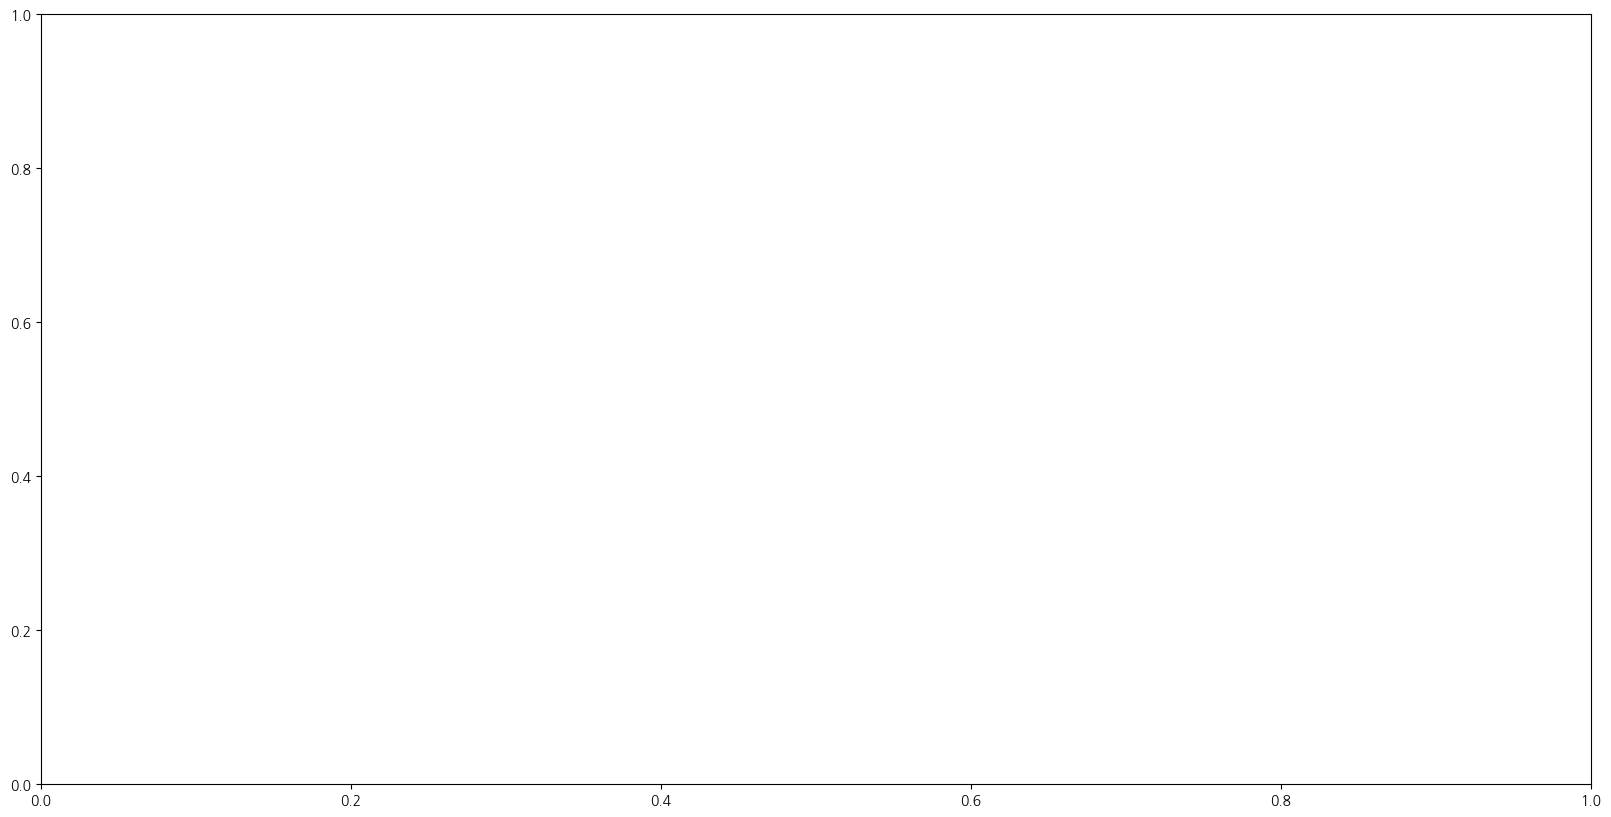

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)
plt.show()

In [23]:
result = pd.DataFrame({'실제값': y_test, '예측값': pred})
result

,실제값,예측값
357,21.7,23.016076
337,18.5,19.175452
327,22.2,19.931333
13,20.4,19.192223
418,8.8,4.733661
...,...,...
413,16.3,9.805358
408,17.2,13.675562
80,28.0,28.487892
451,15.2,20.270360


In [24]:
import statsmodels.api as sm # R과 동일하게 종속변수인 y를 먼저 선언

In [25]:
ols = sm.OLS(y_train, X_train)
model = ols.fit()
print((model.summary()))

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              48.84
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    1.37e-73
Time:                        17:26:15   Log-Likelihood:                         -1668.1
No. Observations:                 404   AIC:                                      3362.
Df Residuals:                     391   BIC:                                      3414.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

25,000평방피트초과, 비소매상업지역비율,찰스강경계,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,학생/교사비율,하위계층비율 

In [26]:
X_scaled=X_scaled[['25,000평방피트초과', '비소매상업지역비율','찰스강경계','가구당평균방수','1940년이전건축비율','직업센터접근성','도로접근성','학생/교사비율','하위계층비율']]

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

In [28]:
ols = sm.OLS(y_train, X_train)
model = ols.fit()
print((model.summary()))

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              70.92
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    6.01e-77
Time:                        17:33:32   Log-Likelihood:                         -1668.7
No. Observations:                 404   AIC:                                      3355.
Df Residuals:                     395   BIC:                                      3391.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

회계식을 쓰시오.
25,000평방피트초과*1.2117 + 비소매상업지역비율*10.4051 + ... + y절편(intercept)

## 릿지 회귀분석(Ridge Regression)
* L2규제, w(가중치)의 절대값을 가능한 한 작게 만들어 0에 가깝게 만든다.
* 모든 특성(Feature, 독립변수) 이 주는 영향력을 최소화
* 변수를 살리고 싶을때(변수가 적을때)

In [30]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print('coef: ', ridge.coef_)
print('intercept: ', ridge.intercept_)
print('mse: ', mean_squared_error(y_test, pred))
print('rmse: ', sqrt(mean_squared_error(y_test, pred)))
print('R_squared: ', r2_score(y_test, pred)) 

coef:  [ 0.24605204 -1.81737167  3.60370525  3.95010012 -1.03003052 -3.00259136
 -1.00834386 -1.98015121 -4.73606794]
intercept:  22.71318826368372
mse:  37.44841278317344
rmse:  6.119510828748768
R_squared:  0.536565449998412


In [33]:
for alpha in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    pred2 = ridge.predict(X_test)
    print('alpha: ', alpha)
    print('-'*50)
    print('coef: ', ridge.coef_)
    print('intercept: ', ridge.intercept_)
    print('mse: ', mean_squared_error(y_test, pred2))
    print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
    print('R_squared: ', r2_score(y_test, pred2))
    print(alpha, f'훈련세트 점수:{ridge.score(X_train, y_train)} ')
    print(alpha, f'테스트세트 점수:{ridge.score(X_test, y_test)} ')

alpha:  0
--------------------------------------------------
coef:  [ 0.25156281 -1.85851923  3.7382541   3.94225629 -1.05345759 -3.07088258
 -1.00891942 -1.96903607 -4.7633331 ]
intercept:  22.719629537579852
mse:  37.41197743590948
rmse:  6.116533122276825
R_squared:  0.5370163475801386
0 훈련세트 점수:0.7403297796070688 
0 테스트세트 점수:0.5370163475801386 
alpha:  0.1
--------------------------------------------------
coef:  [ 0.25099609 -1.85426683  3.72430885  3.94306969 -1.05103522 -3.0639075
 -1.00888428 -1.9701949  -4.76060275]
intercept:  22.718995290439747
mse:  37.41548023350399
rmse:  6.11681945405486
R_squared:  0.5369729994832149
0.1 훈련세트 점수:0.7403295144091543 
0.1 테스트세트 점수:0.5369729994832149 
alpha:  1
--------------------------------------------------
coef:  [ 0.24605204 -1.81737167  3.60370525  3.95010012 -1.03003052 -3.00259136
 -1.00834386 -1.98015121 -4.73606794]
intercept:  22.71318826368372
mse:  37.44841278317344
rmse:  6.119510828748768
R_squared:  0.536565449998412
1 훈련세트

# 라쏘 회계분석

## Lasso(라쏘, L1규제)
* w(가중치)의 절대값에 패널티를 부여해서 0으로 만들고 제거
* 특성(feature, 독립변수)이 너무 많을 때 유용(그냥 제거함)

* L1(라쏘)가 더 강함

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
pred2 = lasso.predict(X_test)
print('coef: ', lasso.coef_)
print('intercept: ', lasso.intercept_)
print('mse: ', mean_squared_error(y_test, pred2))
print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
print('R_squared: ', r2_score(y_test, pred2))
print(alpha, f'훈련세트 점수:{lasso.score(X_train, y_train)} ')
print(alpha, f'테스트세트 점수:{lasso.score(X_test, y_test)} ')

coef:  [ 0.01169207 -0.          0.          4.02676139 -0.          0.
 -0.         -1.41109665 -3.51692532]
intercept:  22.330823383136877
mse:  42.516785870044195
rmse:  6.520489695570739
R_squared:  0.47384291982459625
100 훈련세트 점수:0.6819032942063405 
100 테스트세트 점수:0.47384291982459625 


## Elasticnet(엘라스틱넷 회귀분석)

In [35]:
from sklearn.linear_model import ElasticNet
el_net = ElasticNet()
el_net.fit(X_train, y_train)
pred2 = el_net.predict(X_test)
print('coef: ', el_net.coef_)
print('intercept: ', el_net.intercept_)
print('mse: ', mean_squared_error(y_test, pred2))
print('rmse: ', sqrt(mean_squared_error(y_test, pred2)))
print('R_squared: ', r2_score(y_test, pred2))
print(alpha, f'훈련세트 점수:{el_net.score(X_train, y_train)} ')
print(alpha, f'테스트세트 점수:{el_net.score(X_test, y_test)} ')

coef:  [ 0.35995057 -0.40892673  0.          3.10735277 -0.          0.
 -0.10956435 -1.40888499 -2.38947482]
intercept:  21.999686515733337
mse:  43.44978635845746
rmse:  6.591645193611186
R_squared:  0.46229677863023977
100 훈련세트 점수:0.6275550167989745 
100 테스트세트 점수:0.46229677863023977 
